In [1]:
from backprop_class import draw_dot, value
import random

In [2]:
class Neuron:

  def __init__(self, nin):
    self.w = [value(random.uniform(-1, 1)) for i in range(nin)]
    self.b = value(random.uniform(-1, 1))
    for wei in self.w:
      wei.label = 'w'
    self.b.label = 'b'

  def __call__(self, x):
    act = sum( (wi*xi for wi,xi in zip(self.w, x)) , self.b)
    out = act.tanh()
    out.label = 'out'
    return out
  
  def parameters(self):
    return self.w + [self.b]

class Layer:
  
    def __init__(self, nin, nout):
      self.neurons = [Neuron(nin) for i in range(nout)]
  
    def __call__(self, x):
      outs = [n(x) for n in self.neurons]
      return outs[0]  if len(outs) == 1 else outs
    def parameters(self):
      return [p for n in self.neurons for p in n.parameters()]
      # params = []
      # for neuron in self.neurons:
      #   ps = neuron.parameters()
      #   params.extend(ps)
      # return params
      
    
class MLP:
    
      def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
    
      def __call__(self, x):
        for layer in self.layers:
          x = layer(x)
        return x
      
      def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]
      


In [3]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4,4,1])
y = n(x)

In [4]:
n.parameters()

[Value (data = -0.47046782599180537),
 Value (data = -0.9384928880818799),
 Value (data = 0.2626886158068864),
 Value (data = 0.7628190941303292),
 Value (data = -0.989920966278339),
 Value (data = 0.7043268425204401),
 Value (data = -0.09808797308879091),
 Value (data = -0.3562332782383262),
 Value (data = -0.45824736160640334),
 Value (data = 0.6299396202445671),
 Value (data = -0.5836705162187064),
 Value (data = -0.2281443059631061),
 Value (data = 0.6040180650464035),
 Value (data = -0.042082224820571446),
 Value (data = -0.4599290360482149),
 Value (data = 0.37099709780546264),
 Value (data = -0.9489366850407344),
 Value (data = 0.09364464724100774),
 Value (data = 0.7103755570707013),
 Value (data = 0.4719158338680671),
 Value (data = 0.698318476292898),
 Value (data = -0.9119539579791498),
 Value (data = 0.2902918507548584),
 Value (data = -0.18488330644540185),
 Value (data = -0.12407058605898857),
 Value (data = -0.5326797609182794),
 Value (data = -0.13657871148947676),
 Val

In [5]:
len(n.parameters()) 

41

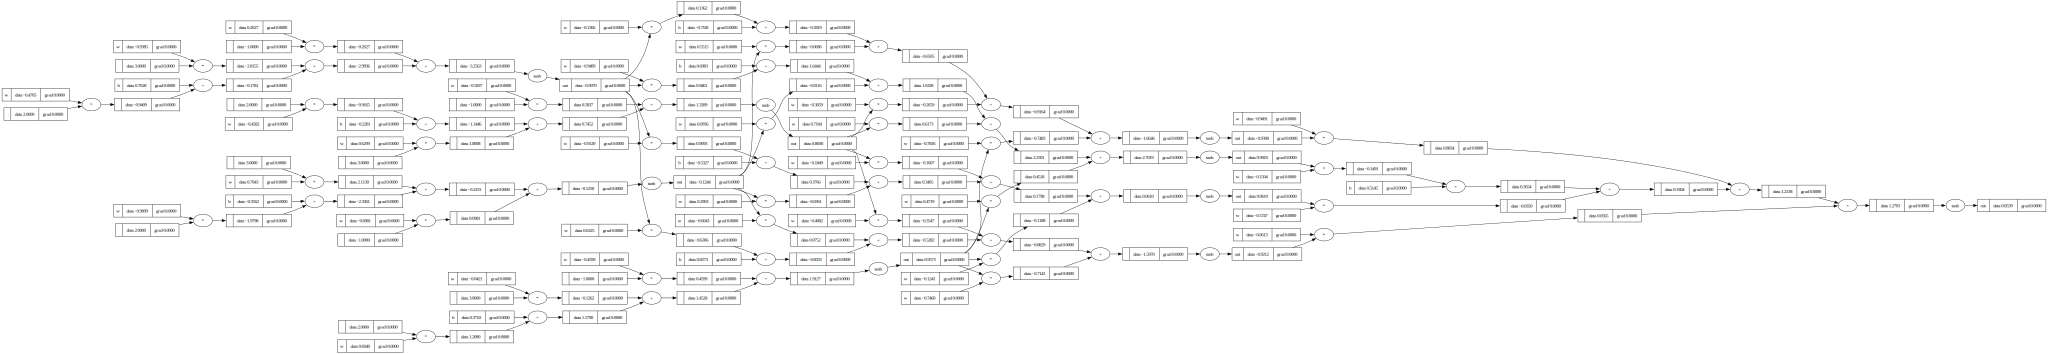

In [6]:
draw_dot(y)

In [7]:
#y.backward()

In [8]:
xs = [
  [2.0,3.0, -1.0],
  [3.0,-1.0,0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0] #desired outputs

ypred = [n(x) for x in xs]
print(ypred)

[Value (data = 0.8538849047760813), Value (data = 0.9514346171892808), Value (data = 0.8628589060040738), Value (data = 0.891649504261803)]


In [9]:
sum([ (yout - ygt)**2 for ygt, yout in zip(ys, ypred)])

Value (data = 7.3114298198223775)

In [10]:
loss = sum([ (yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value (data = 7.3114298198223775)

In [11]:
loss.backward()

In [12]:
n.layers[0].neurons[0].w[2].grad

0.5919437608679552

In [13]:
n.layers[0].neurons[0].w[2].data

0.2626886158068864

In [19]:
for _ in range(20):
  ypred = [n(x) for x in xs]
  loss = sum([ (yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
  loss.reset_grad()
  loss.backward()
  for p in n.parameters():
    p.data += -0.05*p.grad
  print(loss)

Value (data = 0.010135988668192278)
Value (data = 0.009922264403276477)
Value (data = 0.009717130656236184)
Value (data = 0.009520087651685006)
Value (data = 0.009330673205139686)
Value (data = 0.00914845928588167)
Value (data = 0.008973048947370076)
Value (data = 0.008804073580441607)
Value (data = 0.008641190450622635)
Value (data = 0.00848408048605859)
Value (data = 0.008332446286979912)
Value (data = 0.00818601033139792)
Value (data = 0.008044513354957868)
Value (data = 0.007907712885655283)
Value (data = 0.007775381916513809)
Value (data = 0.007647307701389033)
Value (data = 0.007523290660849023)
Value (data = 0.0074031433866325255)
Value (data = 0.007286689734531186)
Value (data = 0.007173763996715196)


In [20]:
n.layers[0].neurons[0].w[2].data

-0.03912864310642894

In [21]:
ypred

[Value (data = 0.9625048825285104),
 Value (data = -0.9600485100024988),
 Value (data = -0.9628021408201712),
 Value (data = 0.9471977473782455)]